In [ ]:
!pip install --ignore-installed --upgrade tensorflow==1.15.0

     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 15.7 MB 34.9 MB/s 
     |████████████████████████████████| 3.8 MB 37.5 MB/s 
     |████████████████████████████████| 1.1 MB 53.1 MB/s 
     |████████████████████████████████| 503 kB 46.4 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 57 kB 5.0 MB/s 
     |████████████████████████████████| 126 kB 46.6 MB/s 
     |████████████████████████████████| 65 kB 3.7 MB/s 
     |████████████████████████████████| 4.3 MB 32.5 MB/s 
     |████████████████████████████████| 75 kB 3.6 MB/s 
     |████████████████████████████████| 4.1 MB 34.7 MB/s 
     |████████████████████████████████| 1.1 MB 38.2 MB/s 
     |████████████████████████████████| 224 kB 49.1 MB/s 
     |████████████████████████████████| 97 kB 6.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=047

In [ ]:
import tensorflow as tf

import matplotlib

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

import lightgbm as lgb

import numpy as np

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

PassengerId      각 승객의 고유번호

Survived         생존 여부

ㄴ0 = No, 1 = Yes

**Pclass           객식 등급

ㄴ1 = 1st, 2 = 2nd, 3 = 3rd

Name             이름

**Sex              성별

**Age              나이

*SibSp            동반한 형재자매, 배우자의 수

*Parch            동반한 부모, 자식의 수

Ticket           티켓 고유넘버

Fare             티켓 요금

Cabin            객식 번호

Embarked         승선한 항

ㄴC = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


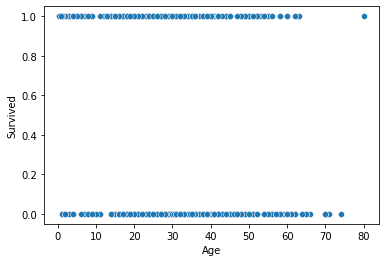

In [ ]:
sns.scatterplot(data=train, x='Age', y='Survived')

In [ ]:
train[['Embarked', 'Survived']].groupby('Embarked').sum().sort_values('Survived')

,Survived
Embarked,
Q,30
C,93
S,217


In [ ]:
train.value_counts('Embarked')

Embarked
S    644
C    168
Q     77
dtype: int64

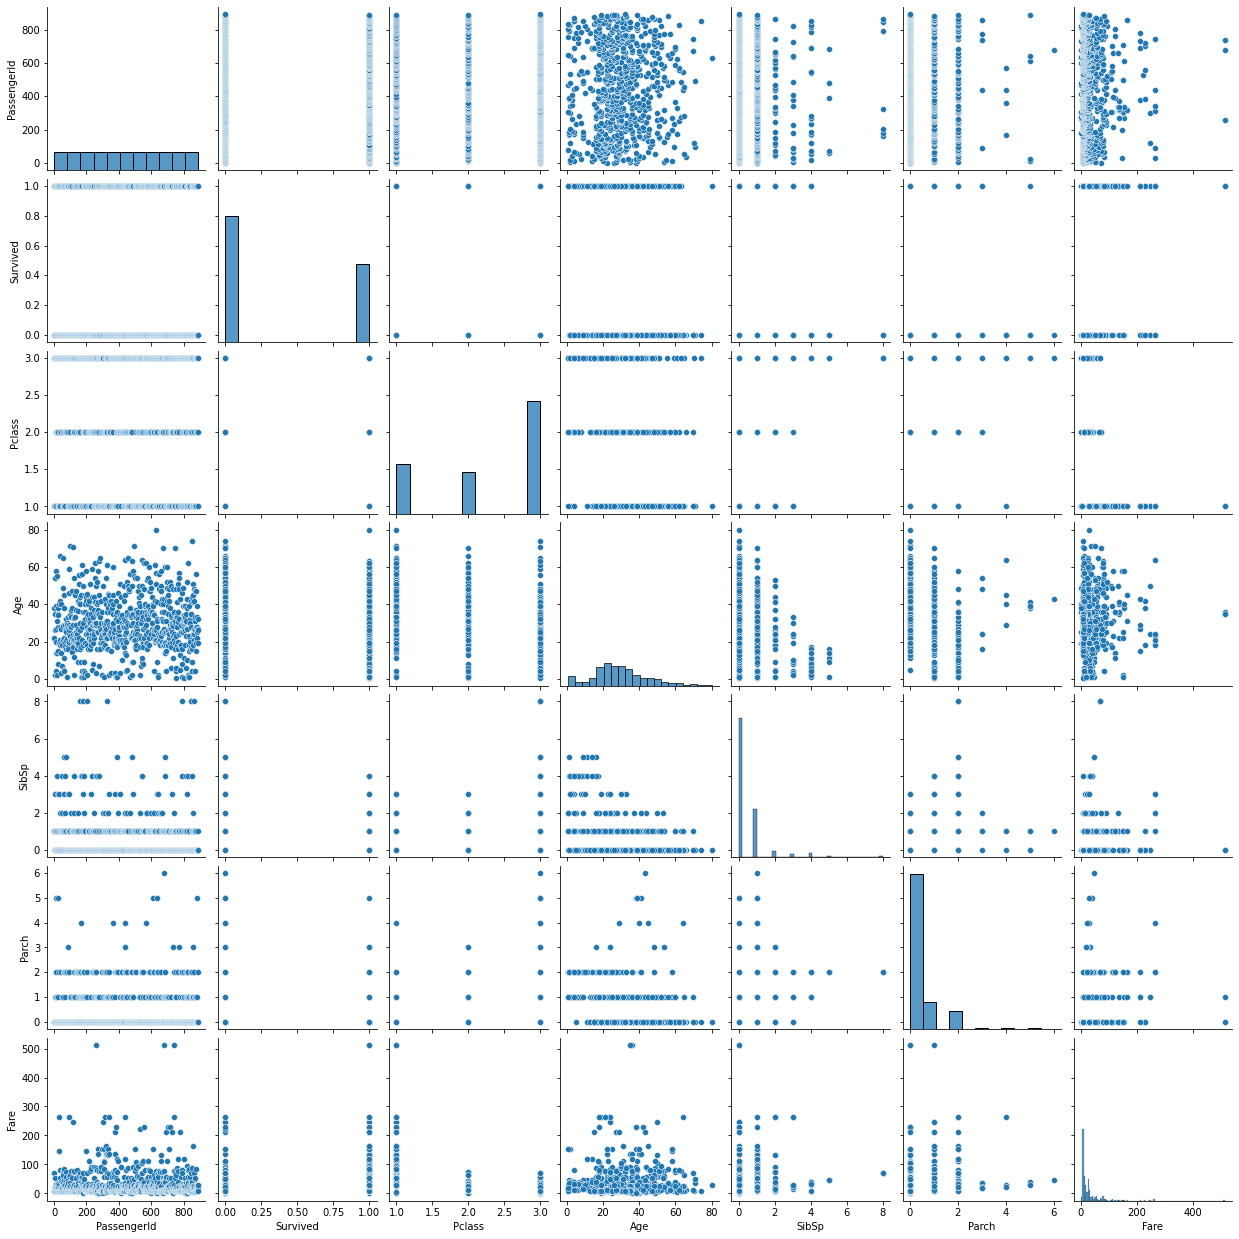

In [ ]:
sns.pairplot(train)

In [ ]:
train[['Pclass', 'Survived']].groupby('Pclass').sum().sort_values('Survived')

,Survived
Pclass,
2,87
3,119
1,136


In [ ]:
train.value_counts('Pclass')

Pclass
3    491
1    216
2    184
dtype: int64

In [ ]:
train[['Sex', 'Survived']].groupby('Sex').sum().sort_values('Survived')

,Survived
Sex,
male,109
female,233


In [ ]:
train.value_counts('Sex')

Sex
male      577
female    314
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


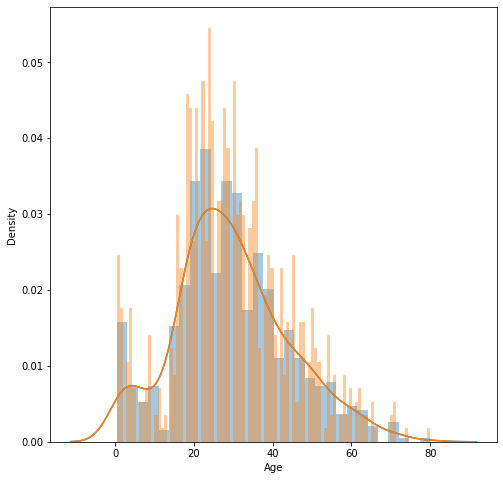

In [ ]:
plt.figure(figsize=[8, 8])
sns.distplot(train['Age'], bins=30)
sns.distplot(train['Age'], bins=100)

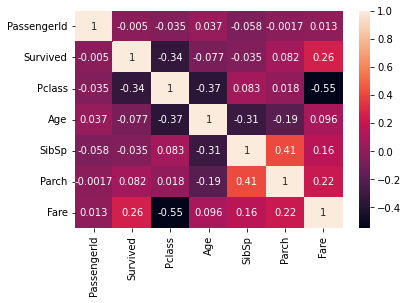

In [ ]:
sns.heatmap(train.corr(), annot = True)

In [ ]:
train['Survived'].unique()

array([0, 1])

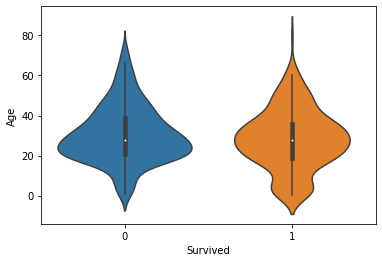

In [ ]:
sns.violinplot(data=train, x='Survived', y='Age')

In [ ]:
train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
train['Fare'] > 10

0      False
1       True
2      False
3       True
4      False
       ...  
886     True
887     True
888     True
889     True
890    False
Name: Fare, Length: 891, dtype: bool

In [ ]:
train[train['Fare'] > 10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
train[train['Fare'] > 10 ] [['Sex', 'Age']]

,Sex,Age
1,female,38.0
3,female,35.0
6,male,54.0
7,male,2.0
8,female,27.0
...,...,...
885,female,39.0
886,male,27.0
887,female,19.0
888,female,NaN


In [ ]:
train[train['Fare'] > 10].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId                                               245793
Survived                                                     275
Pclass                                                      1067
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex            femalefemalemalemalefemalefemalefemalefemalema...
Age                                                     14560.25
SibSp                                                        439
Parch                                                        330
Ticket         PC 1759911380317463349909347742237736PP 954911...
Fare                                                   26168.929
dtype: object

In [ ]:
train.Age.max()

80.0

In [ ]:
train['Age'].isna().sum()

177

In [ ]:
train.sort_values(by = 'Age').tail(200)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:


#div_num=1
for i in range(10):
  for j in trange(80%(i+1)):
    return train[(train['Age'] < j+i) & (train['Age'] >= j)]

  div_num = i
  #condition = []
  #condition.append('i<=Age<i+div_num')

  #train[i<= train['Age'] < i+div_cum]
  #train.loc[df['Age'].isin(condition)]
  
  train[(train['Age'] < i) & (train['Age'] >= 50)]

  #그래프 그리기전 준비 : 범위 지정, 출력, 데이터 준비
  #그래프 그리는 코드
  return #그래프
  div_num += 1

In [ ]:


div_num=1
for i in range(80):
  return train[(train['Age'] >= div_num) & (train['Age'] < +div_num)]

In [ ]:
(train[(train['Age'] < 2) & (train['Age'] >= 1)] ['Survived']).sum()

5

In [ ]:
print(len((train[(train['Age'] < 3) & (train['Age'] >= 0)])))

24


In [ ]:
train[(train['Age'] < 3) & (train['Age'] >= 0)]

In [ ]:
#생존자 합까진 출력했음
for i in range(1, 11):
  j = 0
  print('\n')
  while j<=80:
    print((train[(train['Age'] < j+i) & (train['Age'] >= j)] ['Survived']).sum())
    j += i

In [ ]:
#나이구간별 합을 구해서 생존자 수로부터 '생존 확률'을 구해서 출력
for i in range(1, 11):
  j = 0
  print('\n')
  while j<=80:
    if len(train[(train['Age'] < j+i) & (train['Age'] >= j)]) == 0: #zero division error 방지
      print(0)
    else:
      print((train[(train['Age'] < j+i) & (train['Age'] >= j)] ['Survived']).sum() / (len((train[(train['Age'] < j+i) & (train['Age'] >= j)]))))
    j += i

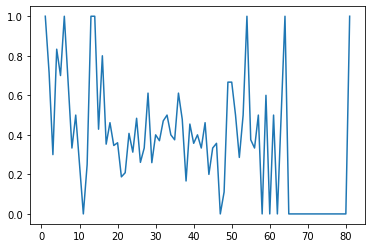

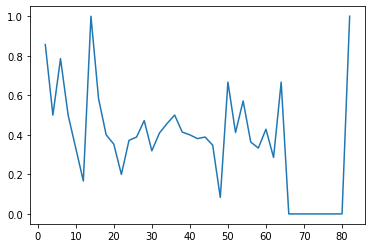

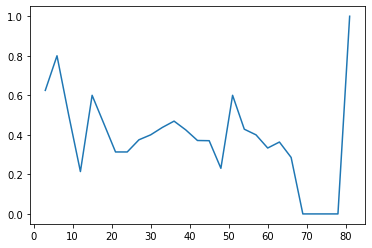

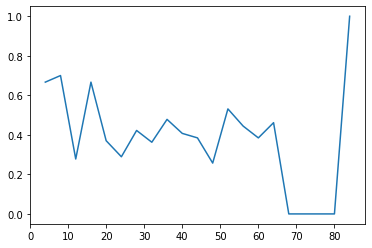

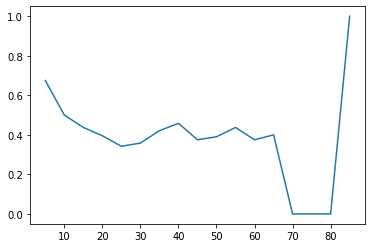

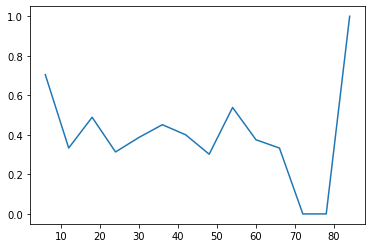

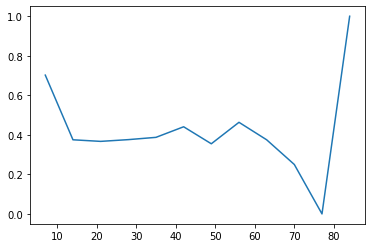

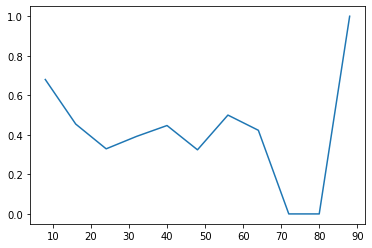

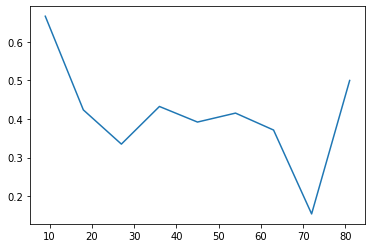

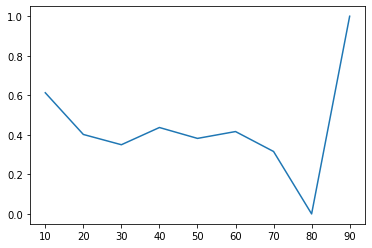

In [ ]:
#그래프로 출력
for i in range(1, 11):
  j = 0
  age_value = []
  surviv_prob = []
  print('\n')
  while j<=80:
    if len(train[(train['Age'] < j+i) & (train['Age'] >= j)]) == 0: #zero division error 방지
      surviv_prob.append(0)
    else:
      surviv_prob.append((train[(train['Age'] < j+i) & (train['Age'] >= j)] ['Survived']).sum() / (len((train[(train['Age'] < j+i) & (train['Age'] >= j)]))))
    j += i
    age_value.append(j)
  plt.figure(i)  #그냥 그래프 출력코드 넣으면 다합쳐져서 나오길래 이렇게 지정해줌
  plt.plot(age_value, surviv_prob)
  plt.show

#영유아의 생존률이 가장 높고, 이후 점차 낮아지지만 청년층을 기준으로 얕은 골짜기를 확인. 이후 완만히 감소, 50~60대에서 역전 확인.

In [ ]:
#이후 그래프로 출력

In [ ]:
(train[(train['Age'] < 22) & (train['Age'] >= 20)] ['Survived']).sum()

8

In [ ]:
train[(train['Age'] < 22) & (train['Age'] >= 20)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S


In [ ]:
train[50 <= train['Age'] < 52]

ValueError: ignored

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train[train['Pclass'] == 1]&[train['Pclass'] == 2]

ValueError: ignored

In [ ]:
train[(train['Age'] < 55) & (train['Age'] >= 50)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
222,223,0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,NaN,S
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


In [ ]:
#결측치는 Age만 채워줄거임.
train['Age'].fillna(value = train['Age'].mean(), inplace = True)

In [ ]:
test['Age'].fillna(value = test['Age'].mean(), inplace = True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
X_train = train[['Age','Pclass','Sex']]

In [ ]:
Y_train = train['Survived']

In [ ]:
X_test = test[['Age','Pclass','Sex']]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
encoder.fit(train['Sex'])

LabelEncoder()

In [ ]:
train_Lable = encoder.transform(train['Sex'])

In [ ]:
test_Lable = encoder.transform(test['Sex'])

In [ ]:
train['Sex'] = train_Lable

In [ ]:
test['Sex'] = test_Lable

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
model.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
pred = model.predict(X_test)

In [ ]:
submission = pd.read_csv('/content/gender_submission.csv')

In [ ]:
submission['Survived'] = pred

In [ ]:
submission.to_csv('sub2.csv',index=False)